## ANÁLISIS

In [1]:

import pandas as pd 

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [193]:
pd.reset_option('display.max_rows', None)


In [5]:
capita = pd.read_csv('data/gasto_capita.csv')
regiones = pd.read_csv('data/gasto_regiones.csv')
pib = pd.read_csv('data/gasto-PIB.csv')


In [147]:
regiones = regiones.set_index('Region')

In [196]:
regiones.head()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2024 (current prices)
Region,,,,,,,,,,,,,,,,,,,,,
World,1749.5,1728.7,1660.7,1749.5,1388.1,1325.2,1291.6,1220.7,1186.1,1196.5,...,1957.3,1980.4,2038.9,2124.5,2200.4,2222.6,2294.5,2447.4,2676.5,2718.2
Africa,20.9,21.2,21.1,18.3,16.8,19.3,26.1,15.9,15.1,16.1,...,44.6,44.0,40.6,41.1,42.3,44.4,42.5,50.2,51.7,52.1
North Africa,3.4,3.6,3.6,3.7,4.2,4.4,4.8,4.6,4.9,5.3,...,19.8,19.0,18.3,19.2,19.9,19.0,18.3,26.2,28.5,30.2
sub-Saharan Africa,17.4,17.6,17.5,14.6,12.6,14.9,21.3,11.3,10.2,10.8,...,24.7,25.1,22.4,21.9,22.5,25.5,24.2,23.9,23.2,21.9
Americas,862.5,853.5,815.1,721.2,755.5,722.2,690.6,652.9,617.3,610.3,...,895.2,893.4,919.6,966.4,1010.6,999.1,987.1,1009.6,1068.4,1100.0


In [149]:
capita = capita.set_index('Country')


In [150]:
pib = pib.set_index('Country')

In [197]:
pib.head()

,Country,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Average_Gasto
0,Algeria,1.75,1.54,1.46,1.21,2.14,2.51,3.15,2.94,3.09,...,5.65,5.31,4.93,5.33,5.89,4.89,4.06,7.39,7.97,3.772162
1,Morocco,4.13,4.39,4.15,4.14,4.30,4.66,4.49,4.35,3.95,...,2.98,2.95,2.90,2.87,3.98,3.75,3.81,3.59,3.52,3.563243
2,Tunisia,2.10,2.11,1.84,1.83,1.71,1.73,1.74,1.74,1.87,...,2.22,2.03,1.98,2.38,2.71,2.63,2.57,2.49,2.51,1.812162
3,Angola,21.98,19.43,17.46,7.10,5.68,17.52,5.71,4.71,2.45,...,2.73,2.51,1.96,1.77,1.81,1.39,1.41,1.41,1.00,5.588378
4,Botswana,4.90,3.57,4.45,4.60,4.48,4.93,4.01,3.51,2.90,...,3.41,3.25,2.92,3.08,3.33,3.05,2.52,2.46,2.83,3.310270


In [152]:
#### COMENZAMOS CON EL ESTUDIO ANALÍTICO. 

## HIPÓTESIS 1 = "Los países más pobres gastan más en defensa (proporcionalmente) que los más ricos"



Para este caso, hemos separado los países en 3 grupos con el PIB de 2023. Alto, medio y bajo.  


In [153]:
grupos_pib = pd.read_csv('PAISES INGLES.csv')

In [154]:
grupos_pib = grupos_pib.drop('Unnamed: 0', axis=1)

In [155]:
grupos_pib = grupos_pib.reset_index()

In [156]:
pib.columns

Index(['1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024'],
      dtype='object')

In [157]:
pib = pib.reset_index()

In [158]:
df_comparado = pd.merge(pib, grupos_pib, on='Country', how='inner')


In [159]:
df_comparado.columns

Index(['Country', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2024', 'index', 'GRUPO_PIB'],
      dtype='object')

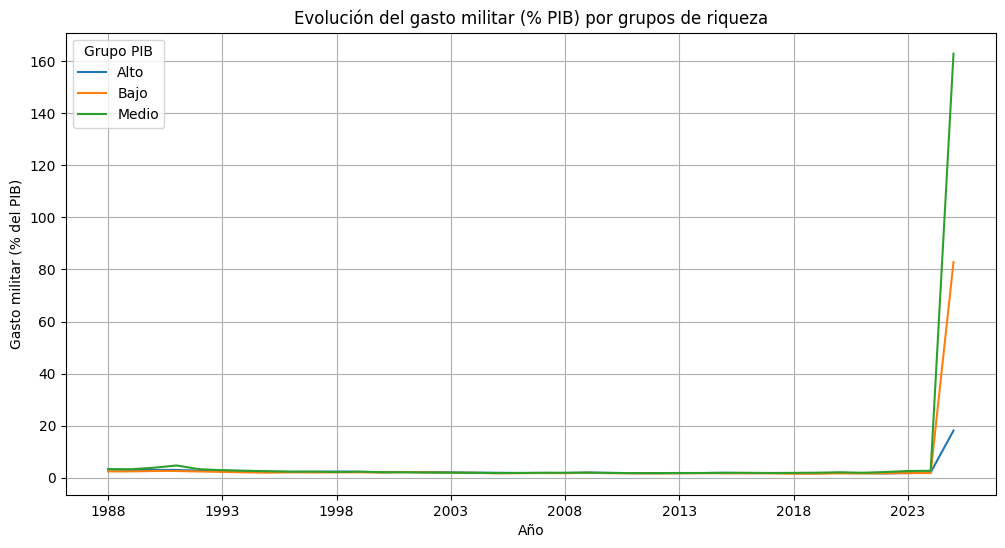

In [ ]:

promedios = df_long.groupby(['Year', 'GRUPO_PIB'])['Gasto_Por_PIB'].mean().unstack()


promedios.plot(figsize=(12,6))
plt.title('Evolución del gasto militar (% PIB) por grupos de riqueza')
plt.xlabel('Año')
plt.ylabel('Gasto militar (% del PIB)')
plt.legend(title='Grupo PIB')
plt.grid(True)
plt.show()

Como podemos apreciar en el gráfico anterior, el grupo "medio" de países según su PIB es el que históricamente ha realizado el mayor gasto proporcional en defensa. 
También vemos que en los años 90, la diferencia era mucho más alta. El grupo "medio" llegó a superar, de media, el 4,5% de su PIB como gasto en defensa.

En la actualidad, el grupo medio sigue siendo el principal inversor en defensa, pero se aprecia una disminución de este gasto hasta el año 2022, momento en el que vuelve a subir en todos los grupos. 

In [162]:
#######################################

## HIPÓTESIS 2 = "Los países fronterizos de la OTAN gastan más que los de la propia OTAN"

Hacemos listas con los países de la OTAN y los vecinos

In [163]:
otan = [
    'Albania', 'Belgium', 'Bulgaria', 'Canada', 'Croatia', 'Czech Republic',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Iceland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Montenegro',
    'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
    'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Turkey', 'United Kingdom', 'United States of America'
]
vecinos = ['Russia', 'Belarus', 'Ukraine', 'Serbia', 'Bosnia and Herzegovina', 
    'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Switzerland', 
    'Austria', 'Ireland', 'Cyprus', 'Kosovo', 'Morocco', 'Algeria', 
    'Tunisia', 'Libya', 'Egypt', 'Syria']

In [ ]:

#quitamos espacios en blanco porque nos daba error 
pib['Country'] = pib['Country'].str.strip()

# También limpiamos la lista otan
otan_limpios = [pais.strip() for pais in otan]

# Ahora filtramos bien y hacemos una copia 
df_otan = pib[pib['Country'].isin(otan_limpios)].copy()

In [ ]:
#cogemos solo los grupos de países que queremos usar 

df_otan = pib[pib['Country'].isin(otan)].copy()
df_vecinos = pib[pib['Country'].isin(vecinos)].copy()

In [ ]:
## cambiamos con .melt para poder hacer mejor los gráficos 

df_otan_long = df_otan.melt(id_vars='Country', var_name='Year', value_name='Gasto')
df_vecinos_long = df_vecinos.melt(id_vars='Country', var_name='Year', value_name='Gasto')

# Convertir 'Year' a entero
df_otan_long['Year'] = df_otan_long['Year'].astype(int)
df_vecinos_long['Year'] = df_vecinos_long['Year'].astype(int)

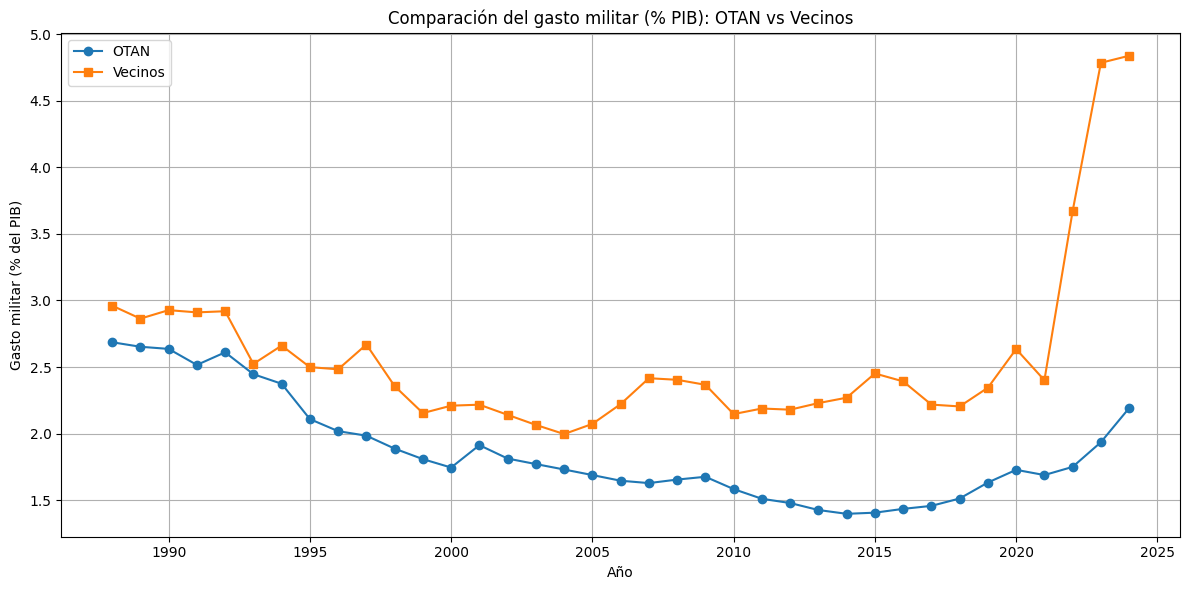

In [ ]:


prom_otan = df_otan_long.groupby('Year')['Gasto'].mean()
prom_vecinos = df_vecinos_long.groupby('Year')['Gasto'].mean()

plt.figure(figsize=(12,6))
plt.plot(prom_otan.index, prom_otan.values, label='OTAN', marker='o')
plt.plot(prom_vecinos.index, prom_vecinos.values, label='Vecinos', marker='s')

plt.title('Comparación del gasto militar (% PIB): OTAN vs Vecinos')
plt.xlabel('Año')
plt.ylabel('Gasto militar (% del PIB)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


En toda la serie histórica con la que trabajamos, desde el 1988, es evidente que los países fronterizos destinan mucho más gasto del PIB proporcionalmente que los miembros de la OTAN. 

Es interesante ahondar un poco más en esta cuestión. Por ejemplo, vemos que entre 2020 y 2025, el gasto de los países vecinos de la OTAN se dispara en promedio, desde menos de un 2,5% hasta casi el 5%. Esto podría deberse al aumento del gasto militar de Rusia por el inicio de su invasión a Ucrania. 



Ahora veremos el top 10 de países por gasto medio en proporción al PIB

In [168]:
pib['Average_Gasto'] = pib.drop(columns='Country').mean(axis=1, skipna=True)


In [169]:
top_paises = pib.sort_values(by='Average_Gasto', ascending=False)

top10 = top_paises.head(10)

C:\Users\pedlo\AppData\Local\Temp\ipykernel_4996\2450211446.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Average_Gasto', y='Country', palette='Reds_r')


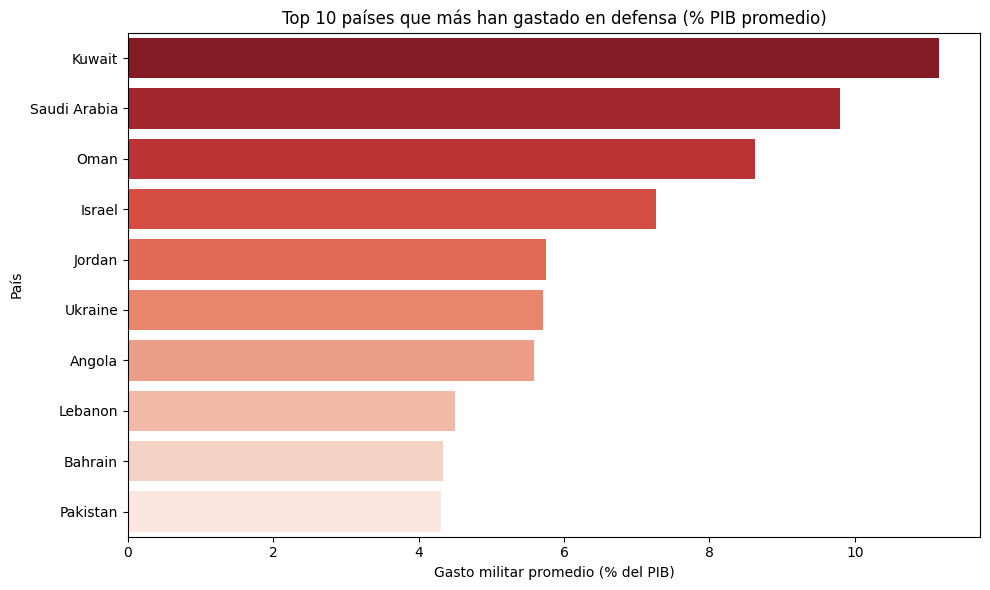

In [ ]:


plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='Average_Gasto', y='Country', palette='Reds_r')

plt.title('Top 10 países que más han gastado en defensa (% PIB promedio)')
plt.xlabel('Gasto militar promedio (% del PIB)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

Podemos concluir que los países que más han gastado en defensa históricamente, ni siquiera son de la OTAN ni vecinos.

Vamos a ver cuáles son los países que más gastan entre esos dos grupos

In [ ]:
# ahora, calculamos qué países han gastado más, la OTAN o vecinos. 

df_otan['Average_Gasto'] = df_otan.drop(columns='Country').mean(axis=1, skipna=True)
df_vecinos['Average_Gasto'] = df_vecinos.drop(columns='Country').mean(axis=1, skipna=True)


In [172]:
top_otan = df_otan.sort_values(by='Average_Gasto', ascending=False)
top_vecinos = df_vecinos.sort_values(by='Average_Gasto', ascending=False)


C:\Users\pedlo\AppData\Local\Temp\ipykernel_4996\122370857.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_otan, x='Average_Gasto', y='Country', palette='Blues_r')
C:\Users\pedlo\AppData\Local\Temp\ipykernel_4996\122370857.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vecinos, x='Average_Gasto', y='Country', palette='Oranges_r')


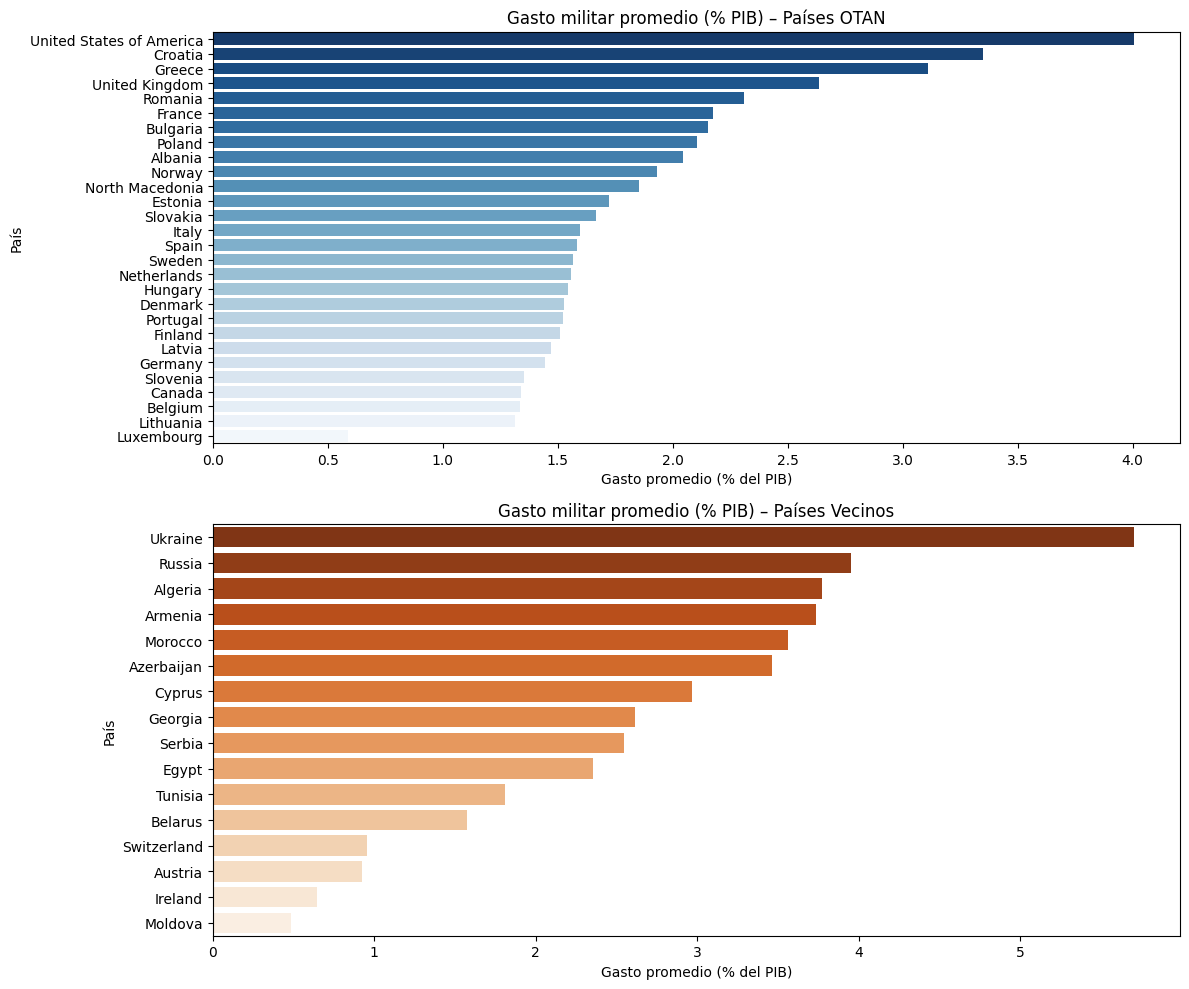

In [173]:

plt.figure(figsize=(12, 10))

# Gráfico OTAN
plt.subplot(2, 1, 1)
sns.barplot(data=top_otan, x='Average_Gasto', y='Country', palette='Blues_r')
plt.title('Gasto militar promedio (% PIB) – Países OTAN')
plt.xlabel('Gasto promedio (% del PIB)')
plt.ylabel('País')

# Gráfico Vecinos

plt.subplot(2, 1, 2)
sns.barplot(data=top_vecinos, x='Average_Gasto', y='Country', palette='Oranges_r')
plt.title('Gasto militar promedio (% PIB) – Países Vecinos')
plt.xlabel('Gasto promedio (% del PIB)')
plt.ylabel('País')

plt.tight_layout()
plt.show()

Podemos apreciar varias cosas. Ucrania y Rusia son los vecinos de la OTAN que más porcentaje del PIB destinan a defensa. Entendemos que el pico en el gráfico de líneas se debe al aumento de estos dos países en guerra. 

Proporcionalmente, Rusia y EEUU destinan la misma cifra en promedio a defensa. En 2024, por hacer una comparación de los últimos datos, EEUU destinó un 3.4% a defensa. Rusia un 7%.


EEUU destinó en 2024 unos 886.000 millones de dólares para 2024.
Rusia 462.000 millones de dólares. 
La UE 460.000 millones.

In [174]:
df_vecinos.value_counts()


Country      1988  1989  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022   2023   2024   Average_Gasto
Algeria      1.75  1.54  1.46  1.21  2.14  2.51  3.15  2.94  3.09  3.64  3.97  3.76  3.43  3.52  3.41  3.00  3.05  2.73  2.51  2.77  2.87  3.51  3.19  3.96  4.11  4.42  4.96  5.55  5.65  5.31  4.93  5.33  5.89  4.89  4.06   7.39   7.97   3.772162         1
Armenia      3.77  3.77  3.77  3.77  2.20  2.30  3.77  4.06  3.28  3.91  3.53  3.70  3.56  3.13  2.70  2.73  2.74  2.87  2.95  3.04  3.40  4.16  4.27  3.85  3.58  4.00  3.94  4.24  4.09  3.85  4.12  4.79  4.98  4.47  4.08   5.51   5.48   3.739459         1
Austria      1.30  1.23  1.20  1.15  1.10  1.12  1.09  1.07  1.05  1.05  1.02  0.98  0.98  0.91  0.89  0.92  0.90  0.86  0.79  0.91  0.88  0.84  0.83  0.80  0.78  0.76  0.75  0.70  0.73  0.76  0.75  0.75  0.89  0.87  0.77   0.87   1.0

## HIPÓTESIS 3 = "El gasto militar en Oriente Medio es históricamente más estable que en Europa"


In [175]:
regiones.columns

Index(['1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024', '2024 (current prices)'],
      dtype='object')

In [176]:
#pasamos a str los nombres de las columnas

regiones.columns = regiones.columns.astype(str)


In [177]:
#terminamos de limpiar bien, reemplazando algunos valores que faltan por la mediana de la línea
regiones.replace('...', np.nan, inplace=True)

regiones = regiones.apply(pd.to_numeric, errors='coerce')

regiones = regiones.T.fillna(regiones.T.median()).T

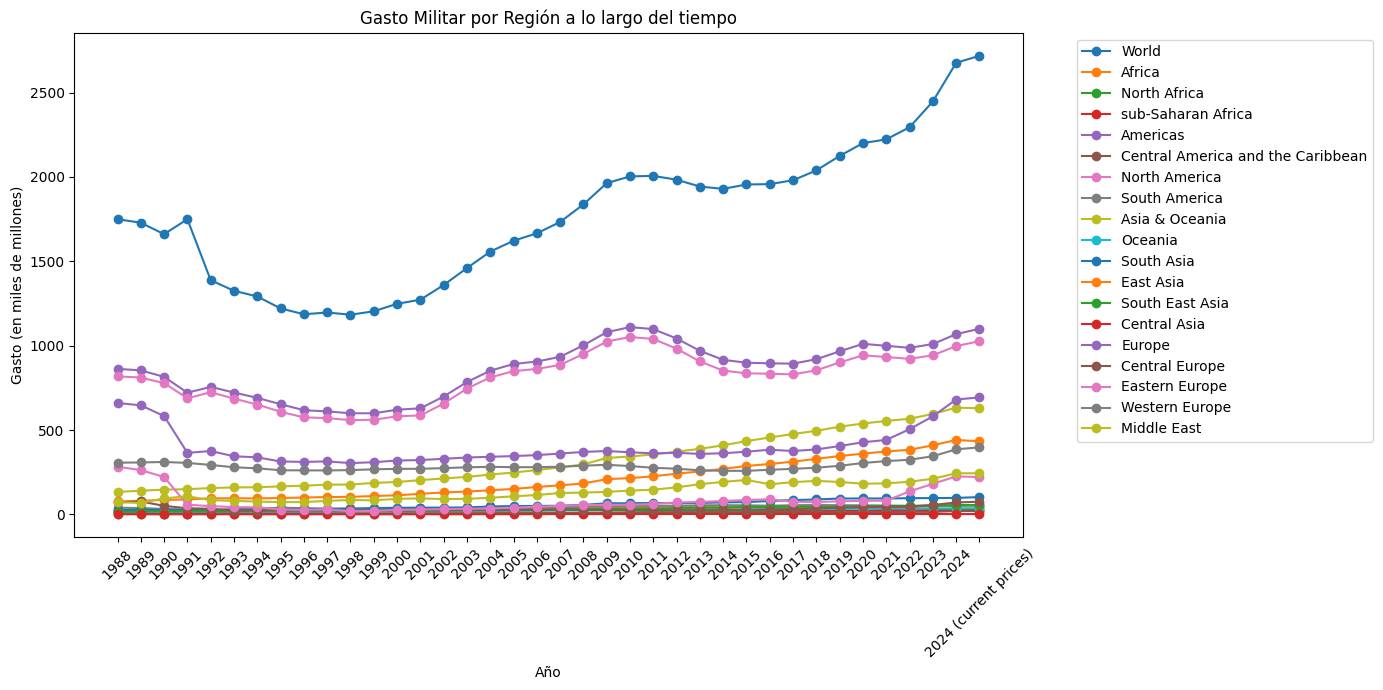

In [178]:
#vamos a hacer un gráfico de todas las zonas según su gasto histórico. 
plt.figure(figsize=(14, 7))

for region in regiones.index:
    plt.plot(regiones.columns, regiones.loc[region], label=region, marker='o')

plt.title('Gasto Militar por Región a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Gasto (en miles de millones)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#este gráfico no se entiende bien porque hay demsiados datos.
# Tiene más sentido juntar las zonas. Podríamos hacerlo simplemente por
#continentes, pero tene sentido tener a Oriente Medio por separado por el 
# peso que tienen estos países en la suma total

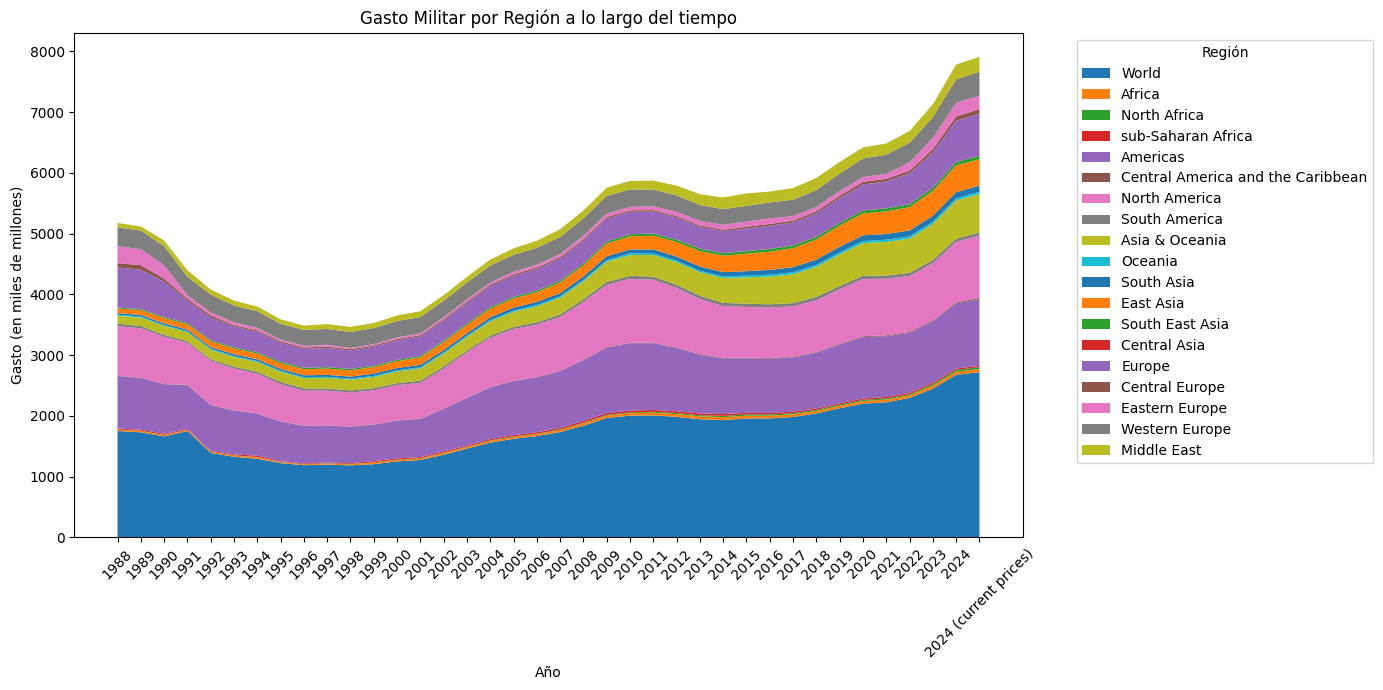

In [181]:
regiones.index 

Index(['World', 'Africa', 'North Africa', 'sub-Saharan Africa', 'Americas',
       'Central America and the Caribbean', 'North America', 'South America',
       'Asia & Oceania', 'Oceania', 'South Asia', 'East Asia',
       'South East Asia', 'Central Asia', 'Europe', 'Central Europe',
       'Eastern Europe', 'Western Europe', 'Middle East'],
      dtype='object', name='Region')

In [182]:
diccionario_mundo = {
    'Africa': 'Africa',
    'North Africa': 'Africa',
    'sub-Saharan Africa': 'Africa',

    'Middle East': 'Middle East',

    'Europe': 'Europe',
    'Central Europe': 'Europe',
    'Eastern Europe': 'Europe',
    'Western Europe': 'Europe',

    'North America': 'North & Central America',
    'Central America and the Caribbean': 'North & Central America',

    'South America': 'South America',

    'Asia & Oceania': 'Asia',
    'Oceania': 'Asia',
    'South Asia': 'Asia',
    'East Asia': 'Asia',
    'South East Asia': 'Asia',
    'Central Asia': 'Asia',
}


In [183]:
regiones_filtrado = regiones.drop('World', errors='ignore')

regiones_filtrado['Grupo'] = regiones_filtrado.index.map(diccionario_mundo)

regiones_agrupadas = regiones_filtrado.dropna(subset=['Grupo'])

# Agrupar por 'Grupo' y sumar
regiones_final = regiones_agrupadas.groupby('Grupo').sum()

In [184]:
regiones_final.index


Index(['Africa', 'Asia', 'Europe', 'Middle East', 'North & Central America',
       'South America'],
      dtype='object', name='Grupo')

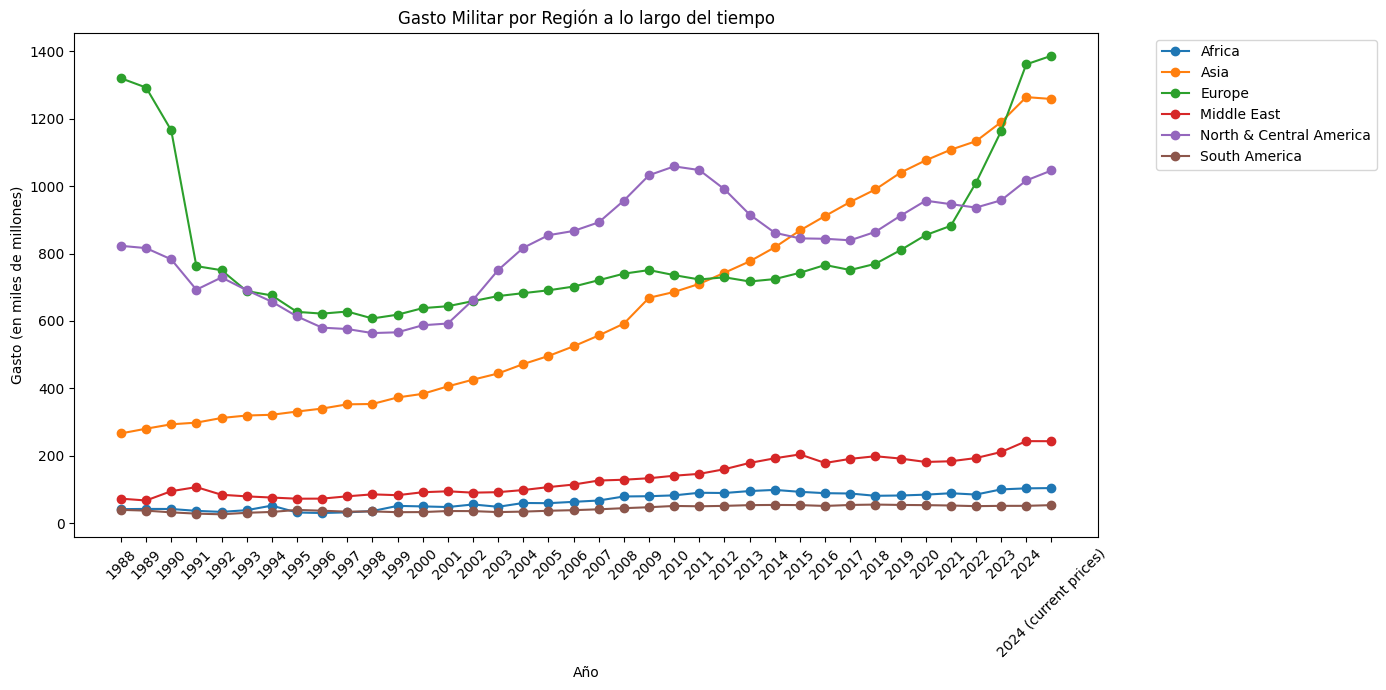

In [185]:
#vamos a hacer un gráfico de todas las zonas según su gasto histórico. 
plt.figure(figsize=(14, 7))

for region in regiones_final.index:
    plt.plot(regiones_final.columns, regiones_final.loc[region], label=region, marker='o')

plt.title('Gasto Militar por Región a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Gasto (en miles de millones)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

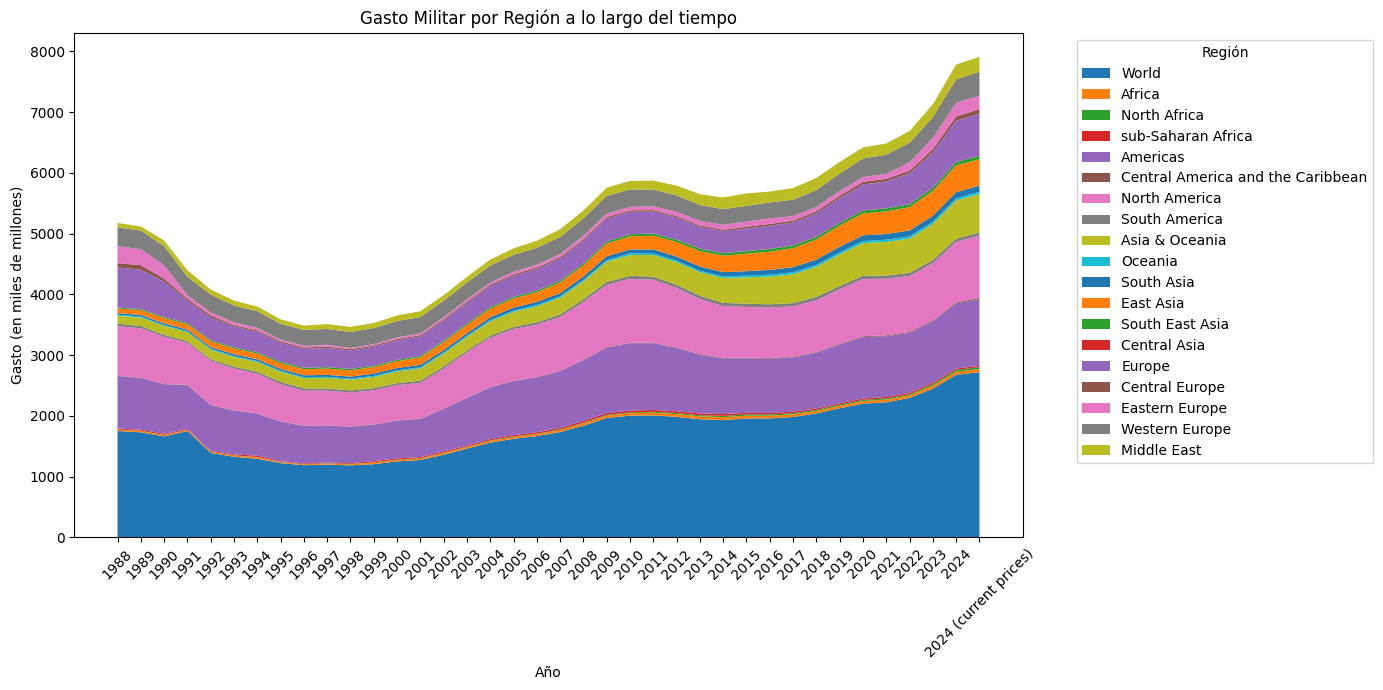

In [202]:
#aprovechamos y hacemos un gráfico de flujo 

plt.figure(figsize=(14, 7))

plt.stackplot(regiones.columns, regiones.values, labels=regiones.index)

plt.title('Gasto Militar por Región a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Gasto (en miles de millones)')
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


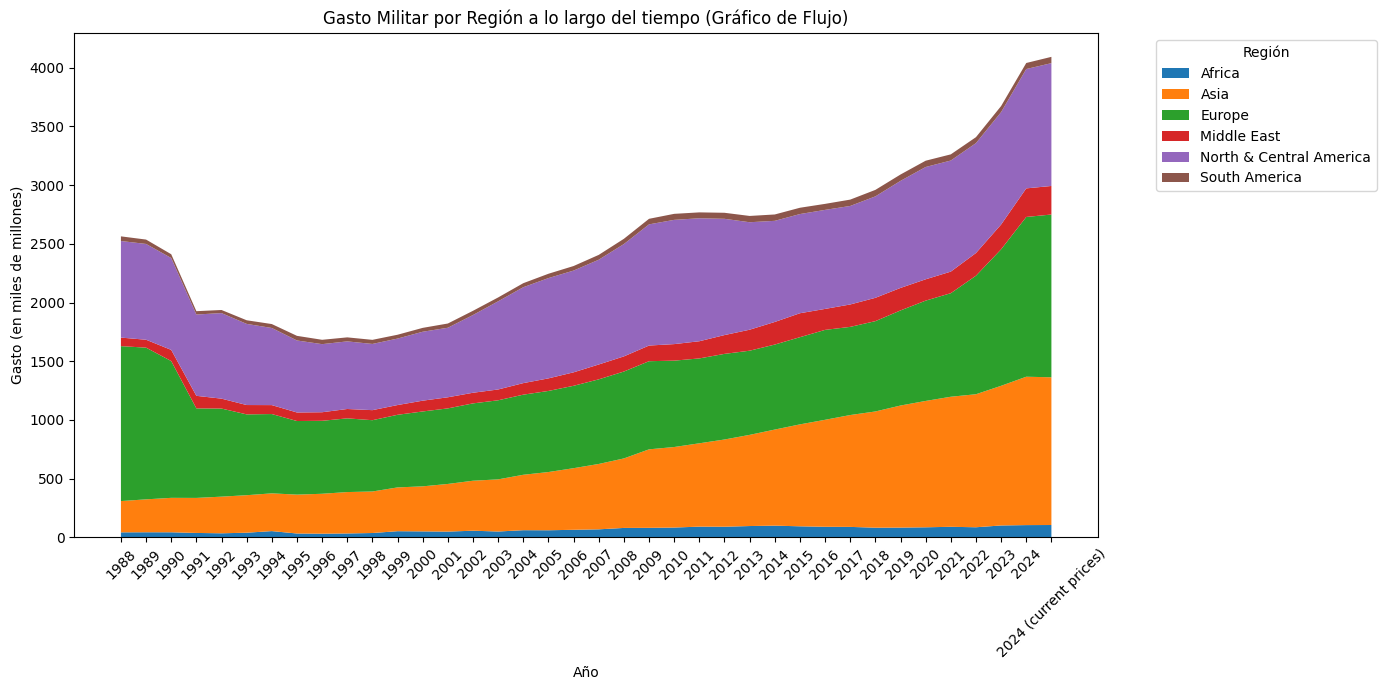

In [186]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# stackplot necesita: eje X (años) + una lista de series (una por región)
plt.stackplot(regiones_final.columns, regiones_final.values, labels=regiones_final.index)

plt.title('Gasto Militar por Región a lo largo del tiempo (Gráfico de Flujo)')
plt.xlabel('Año')
plt.ylabel('Gasto (en miles de millones)')
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En contra de lo que pensábamos al principio, el gasto total en el tiempo ha sido mucho más elevado en el caso europeo que en el de Oriente Medio

In [187]:
# comparemos marginalmente estas dos regiones.

regiones_comparar = regiones_final.loc[['Europe', 'Middle East']]


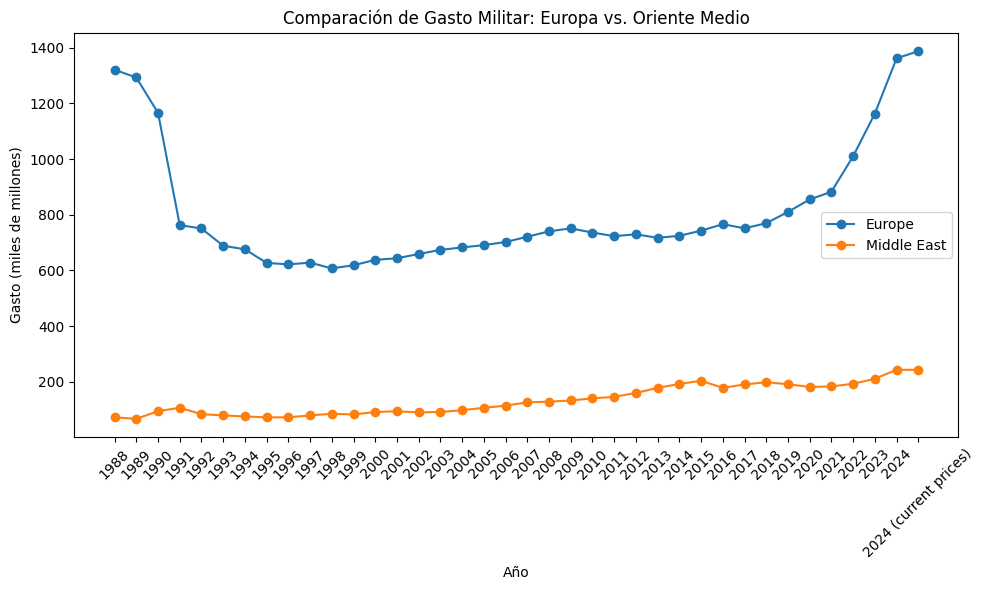

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for region in regiones_comparar.index:
    plt.plot(regiones_comparar.columns, regiones_comparar.loc[region], label=region, marker='o')

plt.title('Comparación de Gasto Militar: Europa vs. Oriente Medio')
plt.xlabel('Año')
plt.ylabel('Gasto (miles de millones)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Para tener una fotografía más clara, compararemos el gasto proporcional al PIB medio en ambas zonas. 

In [ ]:
#hacemos listas de los países de Eruropa y de Oriente Medio. Todo en inglés porque tengo los nombres de los países así- 
 
europe_countries = [
    'Germany', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Denmark',
    'Slovakia', 'Slovenia', 'Spain', 'Estonia', 'Finland', 'France', 'Greece',
    'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
    'Netherlands', 'Poland', 'Portugal', 'Czech Republic', 'Romania', 'Sweden'
]

middle_east_countries = [
    'Saudi Arabia', 'Bahrain', 'Cyprus', 'Egypt', 'United Arab Emirates', 'Iraq',
    'Iran', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Syria',
    'Turkey', 'Yemen'
]

# filtro columnas de los años
anios = pib.columns.drop("Country")  ## quitamos la columna Country, que nos daba problemas todo el rato por ser str. 

europa_df = pib[pib['Country'].isin(europe_countries)][anios]
oriente_df = pib[pib['Country'].isin(middle_east_countries)][anios]

# calculo media 
europa_media = europa_df.mean()
oriente_media = oriente_df.mean()


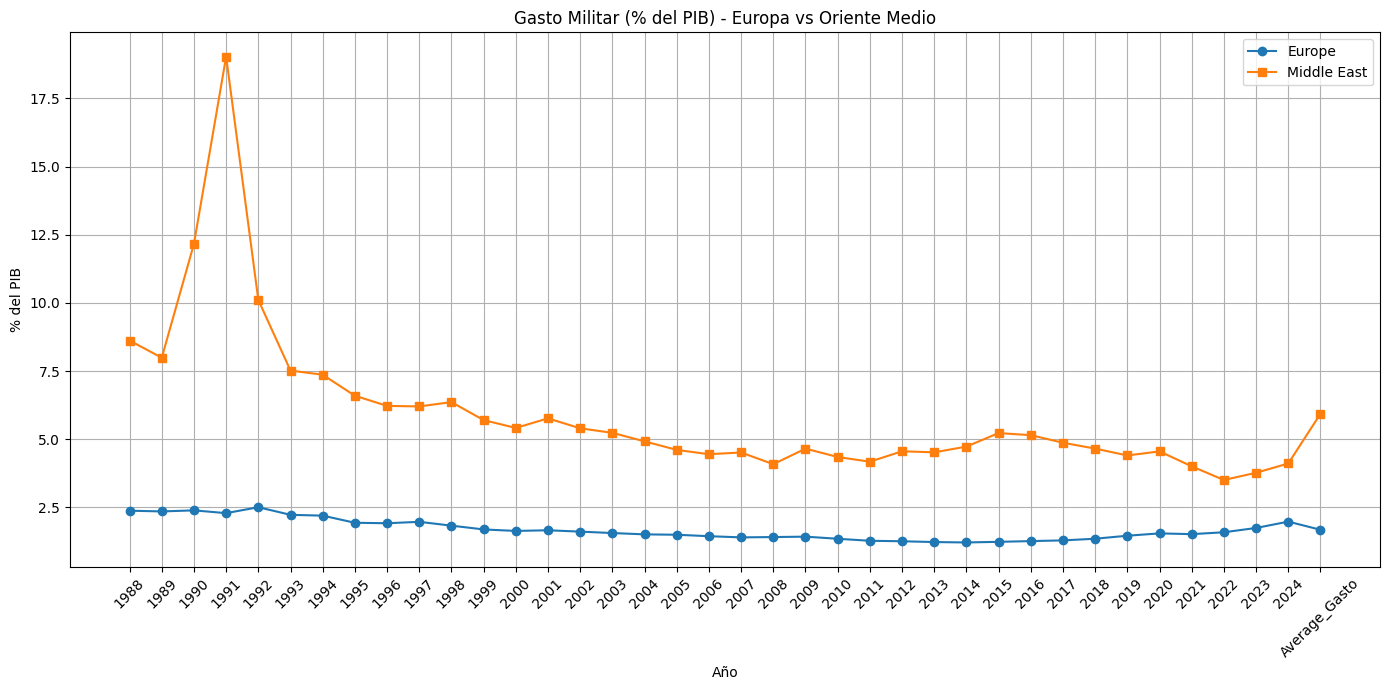

In [190]:

plt.figure(figsize=(14, 7))
plt.plot(europa_media.index, europa_media.values, label='Europe', marker='o')
plt.plot(oriente_media.index, oriente_media.values, label='Middle East', marker='s')

plt.title('Gasto Militar (% del PIB) - Europa vs Oriente Medio')
plt.xlabel('Año')
plt.ylabel('% del PIB')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Este gráfico es completamente distinto al anterior. 

En este caso, vemos que la partida presupuestaria destinada a la defensa en Oriente Medio es muchísimo más alta que en Europa, donde se ha mantenido más estable en términos porporcionales. 

En el caso de Oriente Medio, es visualmente evidente como se disparó de media la inversión entre los años de 1989 a 1991, durante la Guerra del Golfo. 

In [191]:
####################


## HIPÓTESIS 4 = "EEUU no es el país que más gasta en defensa per cápita"


Comparamos el gasto per cápita de los países. En este caso nos vale con mirar las primeras líneas de nuestro dataframe.



In [192]:
## en el df capita tenemos un par de columnas con str, las quitamos para este estudio 

capita_numeric = capita.copy()
años = capita.columns.drop(['Country', 'Continent', 'na_por_fila'])

for col in años:
    capita_numeric[col] = capita_numeric[col].str.replace(',', '.').astype(float)

# Ahora calculamos la media por fila
capita_numeric['media_paises'] = capita_numeric[años].mean(axis=1)

# Sacamos los 10 valores más altos con sus países
top10 = capita_numeric[['Country', 'media_paises']].sort_values(by='media_paises', ascending=False).head(10)

print(top10)


KeyError: "['Country'] not found in axis"

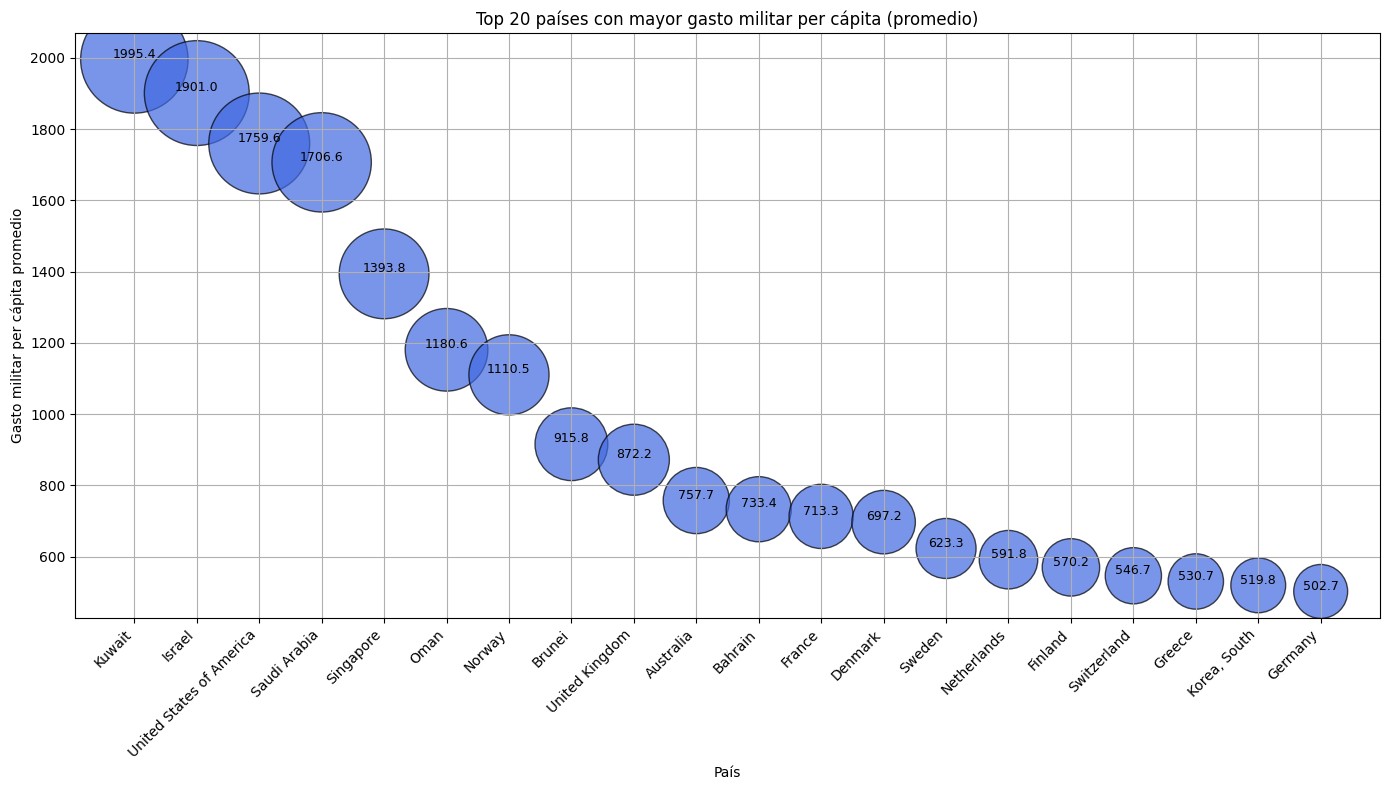

In [ ]:
import matplotlib.pyplot as plt

# Top 20 países con mayor gasto medio per cápita
top20 = capita_numeric[['Country', 'media_paises']].sort_values(by='media_paises', ascending=False).head(20)

# Crear gráfico de burbujas
plt.figure(figsize=(14, 8))
plt.scatter(top20['Country'], top20['media_paises'], 
            s=top20['media_paises'] * 3,  # tamaño proporcional (ajustable)
            alpha=0.7, color='royalblue', edgecolors='black')

#etiquetamso
for i in range(len(top20)):
    plt.text(top20['Country'].iloc[i], top20['media_paises'].iloc[i] + 5, 
             round(top20['media_paises'].iloc[i], 1),
             ha='center', fontsize=9)

plt.title('Top 20 países con mayor gasto militar per cápita')
plt.ylabel('Gasto militar per cápita promedio')
plt.xlabel('País')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


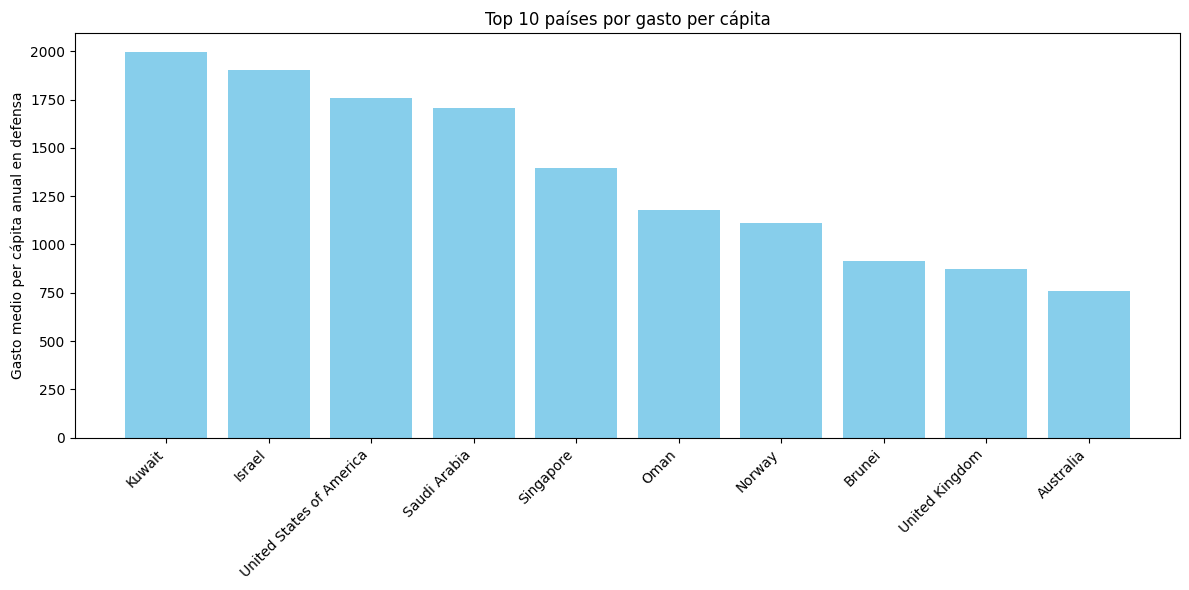

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(top10['Country'], top10['media_paises'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Gasto medio per cápita anual en defensa')
plt.title('Top 10 países por gasto per cápita')
plt.tight_layout()
plt.show()


Teníamos razón en nuestra hipótesis, EEUU no es el país que más gasta per cápita, sino el tercero tras Kuwait e Israel. 

In [ ]:
pib.columns

Index(['Country', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2024'],
      dtype='object')

In [ ]:
datos_rusia = pib[pib['Country'] == 'Russia']




In [ ]:
datos_rusia

,Country,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
104,Russia,3.95,3.95,3.95,3.95,4.43,4.18,4.52,3.78,3.76,...,4.87,5.43,4.25,3.72,3.86,4.14,3.58,4.61,5.4,7.05


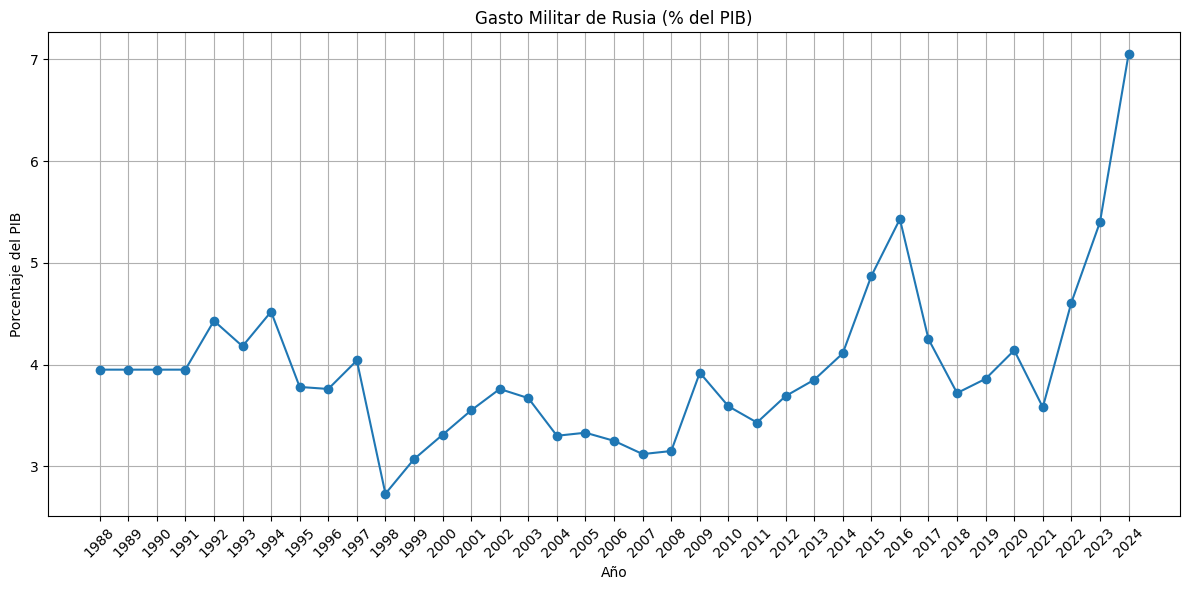

In [ ]:
import matplotlib.pyplot as plt

# Filtramos la fila de Rusia
rusia = pib[pib['Country'] == 'Russia']

columnas_anos = [col for col in pib.columns if col.isdigit()]
valores = rusia[columnas_anos].iloc[0]

valores = pd.to_numeric(valores, errors='coerce')

# Graficamos
plt.figure(figsize=(12, 6))
plt.plot(columnas_anos, valores, marker='o')
plt.title('Gasto Militar de Rusia (% del PIB)')
plt.xlabel('Año')
plt.ylabel('Porcentaje del PIB')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



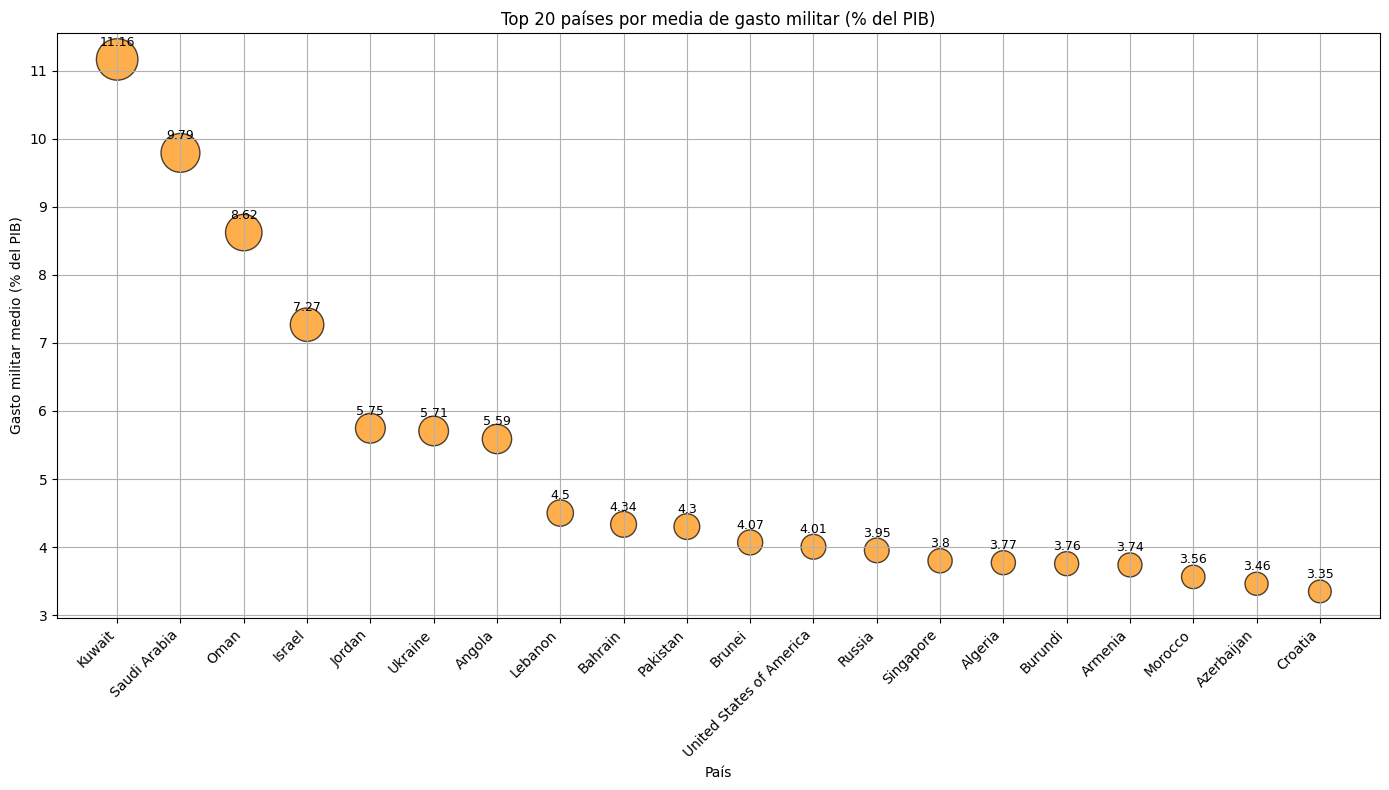

In [ ]:
import matplotlib.pyplot as plt

pib_numeric = pib.copy()

columnas_años = pib.columns.drop('Country')

pib_numeric[columnas_años] = pib_numeric[columnas_años].replace(',', '.', regex=True).astype(float)

# Calculamos media por país
pib_numeric['media_porcentaje_pib'] = pib_numeric[columnas_años].mean(axis=1)

# Obtenemos top 20
top20_pib = pib_numeric[['Country', 'media_porcentaje_pib']].sort_values(by='media_porcentaje_pib', ascending=False).head(20)

# Gráfico de burbujas
plt.figure(figsize=(14, 8))
plt.scatter(top20_pib['Country'], top20_pib['media_porcentaje_pib'],
            s=top20_pib['media_porcentaje_pib'] * 80,  # tamaño ajustable
            alpha=0.7, color='darkorange', edgecolors='black')

# Añadimos etiquetas con los valores
for i in range(len(top20_pib)):
    plt.text(top20_pib['Country'].iloc[i], 
             top20_pib['media_porcentaje_pib'].iloc[i] + 0.2, 
             round(top20_pib['media_porcentaje_pib'].iloc[i], 2),
             ha='center', fontsize=9)

plt.title('Top 20 países por media de gasto militar (% del PIB)')
plt.ylabel('Gasto militar medio (% del PIB)')
plt.xlabel('País')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()
